In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import rc, axes as ax, pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from math import radians, cos, sin, asin, sqrt

pd.set_option('display.width', 1500)

def haversine(row):
    # convert decimal degrees to radians     
    #convert lon, lat to floats
    row['FROM LONGITUDE'], row['FROM LATITUDE'], row['TO LONGITUDE'], row['TO LATITUDE'] = \
          map(float, [row['FROM LONGITUDE'], row['FROM LATITUDE'], row['TO LONGITUDE'], row['TO LATITUDE']])
    lon1, lat1, lon2, lat2 = \
          map(radians, [row['FROM LONGITUDE'], row['FROM LATITUDE'], row['TO LONGITUDE'], row['TO LATITUDE']])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    
    c = 2 * asin(sqrt(a))    
    r = 3956  # Radius of earth in kilometers. Use 3956 for miles 6371km for km
    
    return c * r

In [3]:
CONN = sql.connect("/Users/divya/projects/pandas/divvy-example/Divvy_Trips.db")
stations = "SELECT * FROM temp WHERE [FROM STATION ID] = 90 OR [TO STATION ID] = 90";
df = pd.read_sql(stations, con = CONN)
CONN.close()

#iterate through all
#  stations ="SELECT * FROM temp WHERE [FROM STATION ID] = {0} OR [TO STATION ID] = {0}".format(i)

In [4]:
# ADD NEW COLUMN TO DATAFRAME (RUN AGGREGATES ON THIS - SUM/MEAN/MEDIAN/STD)
df['DISTANCE_Miles'] = df.apply(haversine, axis=1)

print df.head()

    TRIP ID              START TIME               STOP TIME BIKE ID TRIP DURATION FROM STATION ID        FROM STATION NAME TO STATION ID  TO STATION NAME USER TYPE      ...       FROM LONGITUDE                 FROM LOCATION TO LATITUDE  TO LONGITUDE                   TO LOCATION Boundaries - ZIP Codes Zip Codes Community Areas Wards DISTANCE_Miles
0  10426656  06/30/2016 11:58:00 PM  07/01/2016 12:14:00 AM    1858           967              90          Millennium Park            90  Millennium Park  Customer      ...         -87.62408432  POINT (-87.624084 41.881032)  41.8810317  -87.62408432  POINT (-87.624084 41.881032)                     34     14309              38    36       0.000000
1  10426653  06/30/2016 11:58:00 PM  07/01/2016 12:14:00 AM    4199           974              90          Millennium Park            90  Millennium Park  Customer      ...         -87.62408432  POINT (-87.624084 41.881032)  41.8810317  -87.62408432  POINT (-87.624084 41.881032)                     

In [6]:
# get unique stations where starting is not equal to destination
uniqueStations = df[df['FROM STATION ID']!=df['TO STATION ID']]

print uniqueStations.head()

    TRIP ID              START TIME               STOP TIME BIKE ID TRIP DURATION FROM STATION ID        FROM STATION NAME TO STATION ID         TO STATION NAME   USER TYPE      ...       FROM LONGITUDE                 FROM LOCATION TO LATITUDE  TO LONGITUDE                   TO LOCATION Boundaries - ZIP Codes Zip Codes Community Areas Wards DISTANCE_Miles
4  10426476  06/30/2016 11:14:00 PM  06/30/2016 11:42:00 PM    4199          1721              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...             -87.6122    POINT (-87.6122 41.891071)  41.8810317  -87.62408432  POINT (-87.624084 41.881032)                      6     21182              37    36       0.923935
5  10426478  06/30/2016 11:14:00 PM  06/30/2016 11:42:00 PM    1858          1717              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...             -87.6122    POINT (-87.6122 41.891071)  41.8810317  -87.62408432  POINT (-87.624084 41.8

In [7]:
uniqueStations['DISTANCE_Miles'].describe()

count    194318.000000
mean          1.094008
std           0.880699
min           0.093029
25%           0.592506
50%           0.923935
75%           1.172028
max           9.542696
Name: DISTANCE_Miles, dtype: float64

In [8]:
df["START TIME"] = pd.to_datetime(df["START TIME"], format="%m/%d/%Y %I:%M:%S %p")
df["STOP TIME"] = pd.to_datetime(df["STOP TIME"], format="%m/%d/%Y %I:%M:%S %p")
print df.head()

    TRIP ID          START TIME           STOP TIME BIKE ID TRIP DURATION FROM STATION ID        FROM STATION NAME TO STATION ID  TO STATION NAME USER TYPE      ...       FROM LONGITUDE                 FROM LOCATION TO LATITUDE  TO LONGITUDE                   TO LOCATION Boundaries - ZIP Codes Zip Codes Community Areas Wards DISTANCE_Miles
0  10426656 2016-06-30 23:58:00 2016-07-01 00:14:00    1858           967              90          Millennium Park            90  Millennium Park  Customer      ...         -87.62408432  POINT (-87.624084 41.881032)  41.8810317  -87.62408432  POINT (-87.624084 41.881032)                     34     14309              38    36       0.000000
1  10426653 2016-06-30 23:58:00 2016-07-01 00:14:00    4199           974              90          Millennium Park            90  Millennium Park  Customer      ...         -87.62408432  POINT (-87.624084 41.881032)  41.8810317  -87.62408432  POINT (-87.624084 41.881032)                     34     14309            

In [10]:
print uniqueStations['START TIME'].min()
print uniqueStations['START TIME'].max()
print uniqueStations['STOP TIME'].min()
print uniqueStations['STOP TIME'].max()

01/01/2014 08:29:00 AM
12/31/2015 11:13:00 AM
01/01/2014 08:35:00 AM
12/31/2015 12:06:00 AM


In [11]:
uniqueStations.loc[:, 'START TIME'] = pd.to_datetime(uniqueStations["START TIME"], format="%m/%d/%Y %I:%M:%S %p")
uniqueStations.loc[:, 'STOP TIME'] = pd.to_datetime(uniqueStations["START TIME"], format="%m/%d/%Y %I:%M:%S %p")
print uniqueStations.dtypes

TRIP ID                           object
START TIME                datetime64[ns]
STOP TIME                 datetime64[ns]
BIKE ID                           object
TRIP DURATION                     object
FROM STATION ID                   object
FROM STATION NAME                 object
TO STATION ID                     object
TO STATION NAME                   object
USER TYPE                         object
GENDER                            object
BIRTH YEAR                        object
FROM LATITUDE                     object
FROM LONGITUDE                    object
FROM LOCATION                     object
TO LATITUDE                       object
TO LONGITUDE                      object
TO LOCATION                       object
Boundaries - ZIP Codes            object
Zip Codes                         object
Community Areas                   object
Wards                             object
DISTANCE_Miles                   float64
dtype: object


/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
#get month of start and end time
#python date time
import datetime as dt

#uniqueStations['START TIME MONTH'] = uniqueStations.apply(lambda row: row['START TIME'].month, axis=1)
uniqueStations.loc[:, 'START TIME MONTH'] = uniqueStations['START TIME'].dt.month
uniqueStations.loc[:, 'START TIME YEAR'] = uniqueStations['START TIME'].dt.year

uniqueStations.loc[:, 'STOP TIME MONTH'] = uniqueStations['STOP TIME'].dt.month
uniqueStations.loc[:, 'STOP TIME YEAR'] = uniqueStations['STOP TIME'].dt.year

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [13]:
print uniqueStations.head()

    TRIP ID          START TIME           STOP TIME BIKE ID TRIP DURATION FROM STATION ID        FROM STATION NAME TO STATION ID         TO STATION NAME   USER TYPE      ...                         TO LOCATION Boundaries - ZIP Codes Zip Codes Community Areas Wards DISTANCE_Miles START TIME MONTH START TIME YEAR STOP TIME MONTH STOP TIME YEAR
4  10426476 2016-06-30 23:14:00 2016-06-30 23:14:00    4199          1721              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...        POINT (-87.624084 41.881032)                      6     21182              37    36       0.923935                6            2016               6           2016
5  10426478 2016-06-30 23:14:00 2016-06-30 23:14:00    1858          1717              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...        POINT (-87.624084 41.881032)                      6     21182              37    36       0.923935                6            2016

In [54]:
uniqueStations.groupby(['START TIME YEAR'])['DISTANCE_Miles'].mean()

#uniqueStations.groupby(['START TIME YEAR', 'START TIME MONTH'])['DISTANCE_Miles'].describe()

#uniqueStations[uniqueStations['START TIME YEAR'] == 2014].groupby(['START TIME YEAR', 'START TIME MONTH'])['DISTANCE_Miles'].describe()

START TIME YEAR
2013    1.135591
2014    1.089034
2015    1.073469
2016    1.111012
Name: DISTANCE_Miles, dtype: float64

In [42]:
uniqueStations.loc[:, 'TRIP DURATION'] = uniqueStations['TRIP DURATION'].astype(float)
uniqueStations.groupby(['USER TYPE'])['TRIP DURATION'].describe()

USER TYPE        
Customer    count    134397.000000
            mean       1782.487399
            std        2445.397998
            min          90.000000
            25%         944.000000
            50%        1343.000000
            75%        1868.000000
            max       86305.000000
Subscriber  count     59921.000000
            mean        822.654362
            std        1315.034955
            min          63.000000
            25%         437.000000
            50%         634.000000
            75%        1029.000000
            max       83159.000000
Name: TRIP DURATION, dtype: float64

In [16]:
#uniqueStations.groupby(['USER TYPE'])['DISTANCE_Miles'].describe()
uniqueStations[['FROM STATION NAME', 'GENDER', 'START TIME', 'DISTANCE_Miles', 'TRIP DURATION']]

,FROM STATION NAME,GENDER,START TIME,DISTANCE_Miles,TRIP DURATION
4,Streeter Dr & Grand Ave,,2016-06-30 23:14:00,0.923935,1721.0
5,Streeter Dr & Grand Ave,,2016-06-30 23:14:00,0.923935,1717.0
6,Streeter Dr & Grand Ave,,2016-06-30 23:04:00,0.923935,1159.0
7,Streeter Dr & Grand Ave,,2016-06-30 23:03:00,0.923935,1173.0
8,Millennium Park,Male,2016-06-30 22:35:00,1.276876,570.0
9,Millennium Park,Male,2016-06-30 22:22:00,2.362827,1595.0
10,Millennium Park,Female,2016-06-30 22:02:00,0.909094,986.0
13,Indiana Ave & Roosevelt Rd,Female,2016-06-30 21:42:00,0.909094,1187.0
14,Millennium Park,,2016-06-30 21:37:00,1.036608,851.0
15,Millennium Park,Male,2016-06-30 21:34:00,1.345794,1270.0


In [17]:
uniqueStations[uniqueStations['USER TYPE'] == 'Subscriber'].groupby(['START TIME YEAR', 'START TIME MONTH', 'GENDER'])['DISTANCE_Miles', 'TRIP DURATION'].describe()
uniqueStations[uniqueStations['USER TYPE'] == 'Subscriber'].groupby(['GENDER'])['DISTANCE_Miles', 'TRIP DURATION'].describe()

DISTANCE_Miles  TRIP DURATION
GENDER                                     
       count        6.000000       6.000000
       mean         1.019606     726.666667
       std          0.131520     213.793982
       min          0.812874     512.000000
       25%          0.945580     616.750000
       50%          1.102906     653.500000
       75%          1.102906     781.000000
       max          1.102906    1113.000000
Female count    15023.000000   15023.000000
       mean         1.304964     987.518139
       std          0.934604    1654.930324
       min          0.093029     104.000000
       25%          0.807107     568.000000
       50%          0.934410     781.000000
       75%          1.603319    1208.000000
       max          7.450171   78228.000000
Male   count    44892.000000   44892.000000
       mean         1.179052     767.495924
       std          0.893754    1174.579738
       min          0.093029      63.000000
       25%          0.660894     412.000000
       50%          0.909094     580.000000
       75%          1.345794     948.000000
       max          9.542696   83159.000000

In [18]:
#find start date as a day in the week
import calendar as cal
import datetime as dt
uniqueStations.loc[:, 'START WEEKDAY'] = [cal.day_name[i] for i in uniqueStations['START TIME'].dt.weekday]

In [19]:
print uniqueStations.head()

    TRIP ID          START TIME           STOP TIME BIKE ID  TRIP DURATION FROM STATION ID        FROM STATION NAME TO STATION ID         TO STATION NAME   USER TYPE      ...      Boundaries - ZIP Codes Zip Codes Community Areas Wards DISTANCE_Miles START TIME MONTH START TIME YEAR STOP TIME MONTH STOP TIME YEAR START WEEKDAY
4  10426476 2016-06-30 23:14:00 2016-06-30 23:14:00    4199         1721.0              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...                           6     21182              37    36       0.923935                6            2016               6           2016      Thursday
5  10426478 2016-06-30 23:14:00 2016-06-30 23:14:00    1858         1717.0              35  Streeter Dr & Grand Ave            90         Millennium Park    Customer      ...                           6     21182              37    36       0.923935                6            2016               6           2016      Thursday
6  10426393 2016

In [20]:
uniqueStations.groupby(['START WEEKDAY'])['DISTANCE_Miles', 'TRIP DURATION'].describe()
uniqueStations.groupby(['START WEEKDAY', 'GENDER'])['DISTANCE_Miles', 'TRIP DURATION'].describe()
uniqueStations[uniqueStations['START WEEKDAY'].isin(['Saturday', 'Sunday'])].groupby(['START WEEKDAY', 'GENDER'])['DISTANCE_Miles', 'TRIP DURATION'].describe()

DISTANCE_Miles  TRIP DURATION
START WEEKDAY GENDER                                     
Saturday             count    33781.000000   33781.000000
                     mean         1.053546    1847.409224
                     std          0.866395    2548.960843
                     min          0.093029     104.000000
                     25%          0.572779     979.000000
                     50%          0.923935    1383.000000
                     75%          1.148484    1932.000000
                     max          8.502667   84525.000000
              Female count     2143.000000    2143.000000
                     mean         1.243828    1033.361176
                     std          0.817387    1786.690514
                     min          0.093029     104.000000
                     25%          0.876950     611.500000
                     50%          0.958020     846.000000
                     75%          1.481796    1244.000000
                     max          6.964883   78228.000000
              Male   count     3881.000000    3881.000000
                     mean         1.190294     920.063128
                     std          0.853292     873.838189
                     min          0.093029      80.000000
                     25%          0.753622     509.000000
                     50%          0.934410     748.000000
                     75%          1.376072    1148.000000
                     max          8.502667   27677.000000
Sunday               count    29726.000000   29726.000000
                     mean         1.050992    1840.651080
                     std          0.883888    2466.733002
                     min          0.093029      90.000000
                     25%          0.490461     962.000000
                     50%          0.923935    1372.000000
                     75%          1.148484    1929.000000
                     max          8.502667   80976.000000
              Female count     1632.000000    1632.000000
                     mean         1.260491    1093.799632
                     std          0.820417    2085.949188
                     min          0.093029     122.000000
                     25%          0.806582     624.500000
                     50%          0.960258     869.500000
                     75%          1.576553    1289.000000
                     max          5.823604   76470.000000
              Male   count     3341.000000    3341.000000
                     mean         1.216522     934.998803
                     std          0.860504    1298.194857
                     min          0.093029      99.000000
                     25%          0.768557     507.000000
                     50%          0.934410     755.000000
                     75%          1.482870    1152.000000
                     max          9.019024   56292.000000

In [47]:
#Show distance miles and trip duration over the course of a week for females and males
#pivot tables
pd.pivot_table(uniqueStations, index=['START WEEKDAY'], columns=['GENDER'],
               values=['DISTANCE_Miles', 'TRIP DURATION'], aggfunc=np.mean)

,DISTANCE_Miles,TRIP DURATION
START WEEKDAY,,
Friday,1.094084,1435.946899
Monday,1.100296,1407.618573
Saturday,1.077123,1713.166411
Sunday,1.076784,1718.323468
Thursday,1.113597,1349.598966
Tuesday,1.110990,1248.179175
Wednesday,1.107110,1235.071619


In [ ]:
### NEW ###
#user_type_pie = uniqueStations.groupby(["START TIME YEAR","USER TYPE"]).apply(len).reset_index()




In [22]:
#Show average distance and duration per month per year 
pd.pivot_table(uniqueStations, index=['START TIME YEAR', 'START TIME MONTH'], columns=['GENDER'], 
               values=['DISTANCE_Miles', 'TRIP DURATION'], aggfunc=np.mean)

DISTANCE_Miles                     TRIP DURATION                          
GENDER                                             Female      Male                     Female         Male
START TIME YEAR START TIME MONTH                                                                           
2013            6                      1.266054  1.977522  1.191662   2344.000000  1955.846154  1835.538462
                7                      1.165467  1.463338  1.163550   2090.798918  1123.060606   772.440816
                8                      1.144182  1.414007  1.157749   1874.706070  1039.007067   822.652047
                9                      1.108646  1.418927  1.265297   1808.079786   976.353333   840.309963
                10                     1.029158  1.085470  1.303562   1637.845602   845.043478   761.121724
                11                     0.989479  1.103170  1.174160   1549.639033  1161.050847   711.618926
                12                     0.841358  0.862650  1.024201   1557.649446  1581.720430   795.934874
2014            1                      0.796179  0.691286  1.005534   1240.625000   546.484848   748.742671
                2                      0.983098  1.126661  1.046127   1274.608696   923.461538   671.774295
                3                      1.016144  1.190376  1.143591   1709.272727   823.656250   692.261111
                4                      1.016214  1.195030  1.156340   1932.462486   904.201681   712.044508
                5                      1.057495  1.284641  1.217435   1745.413829  1033.883090   808.703729
                6                      1.080689  1.327686  1.220248   1774.147020  1028.765957   821.299900
                7                      1.036077  1.351075  1.217153   1770.937352  1045.163065   836.407018
                8                      1.032056  1.343489  1.185741   1765.842134   965.065502   777.373612
                9                      1.009486  1.317129  1.189982   1596.622877   900.447025   741.955792
                10                     1.011142  1.279117  1.110271   1773.619751   857.532864   696.217560
                11                     0.972273  1.292422  1.003461   1799.870889   898.900474   628.569170
                12                     0.951773  1.144577  1.044087   1556.638790   825.166667   727.680620
2015            1                      0.911183  1.190981  0.912865   1571.744395   782.136364   554.755789
                2                      1.149251  1.298499  0.878713   1292.523810   817.121951   811.271242
                3                      0.965937  1.288302  1.155310   1692.862525   974.603352   756.077031
                4                      1.074934  1.323509  1.166878   1833.931949   918.210884   683.282051
                5                      0.988141  1.309299  1.248535   1796.727653   986.965591   799.680380
                6                      0.987347  1.320964  1.258149   1680.205350   962.987194   813.209848
                7                      1.029960  1.312861  1.250773   1762.424627  1019.079163   835.843658
                8                      1.017719  1.282904  1.200803   1738.331547   933.369231   777.430862
                9                      0.967653  1.312922  1.173190   1718.078403  1024.348000   747.031235
                10                     1.021200  1.381886  1.161658   1782.948380  1168.482222   772.847399
                11                     1.047242  1.271842  1.107223   1802.133446   916.101928   656.024917
                12                     0.983741  1.092242  1.071873   1950.976471   721.483568   662.773196
2016            1                      0.905356  1.088030  0.951540   2337.014085   709.545455   629.624016
                2                      1.051473  1.083047  0.944541   2072.702823   751.282051   572.737313
                3                      0.955829  1.248539  1.123151   1564.556190  1152.691275   670.938819
                4                    

In [23]:
#Show average distance travelled over time, differentiated by customer base
pd.pivot_table(uniqueStations, index=['START TIME YEAR', 'START TIME MONTH'], columns=['USER TYPE'], 
               values=['DISTANCE_Miles', 'TRIP DURATION'], aggfunc=np.mean)

DISTANCE_Miles            TRIP DURATION             
USER TYPE                              Customer Subscriber      Customer   Subscriber
START TIME YEAR START TIME MONTH                                                     
2013            6                      1.266054   1.453616   2344.000000  1875.641026
                7                      1.165417   1.209560   2090.598089   825.647806
                8                      1.144256   1.212602   1875.033546   869.002288
                9                      1.108646   1.298599   1808.079786   869.799133
                10                     1.029158   1.265138   1637.845602   775.907382
                11                     0.989479   1.161058   1549.639033   794.569343
                12                     0.841358   0.997796   1557.649446   924.367311
2014            1                      0.796179   0.975034   1240.625000   729.111765
                2                      0.983098   1.054900   1274.608696   699.192737
                3                      1.016144   1.152555   1709.272727   717.438623
                4                      1.016183   1.163410   1932.932197   747.301931
                5                      1.057495   1.234140   1745.413829   864.677218
                6                      1.080686   1.252200   1774.243849   883.182330
                7                      1.036077   1.258491   1770.937352   900.844148
                8                      1.032040   1.231286   1766.071694   831.585989
                9                      1.009486   1.225364   1596.622877   786.059370
                10                     1.011142   1.146691   1773.619751   731.012658
                11                     0.972273   1.066318   1799.870889   687.373196
                12                     0.951773   1.064259   1556.638790   747.250310
2015            1                      0.911183   0.965160   1571.744395   597.511111
                2                      1.149251   0.928313   1292.523810   811.962536
                3                      0.965937   1.181968   1692.862525   799.880179
                4                      1.074934   1.199194   1833.931949   731.751579
                5                      0.988141   1.262352   1796.727653   842.266015
                6                      0.987347   1.275945   1680.205350   855.643470
                7                      1.029960   1.268678   1762.424627   888.684335
                8                      1.017719   1.224957   1738.331547   823.308062
                9                      0.967653   1.210208   1718.078403   820.499117
                10                     1.021200   1.207118   1782.948380   854.515138
                11                     1.047242   1.145358   1802.133446   716.272495
                12                     0.983741   1.076260   1950.976471   675.417594
2016            1                      0.905356   0.979691   2337.014085   646.107813
                2                      1.051473   0.970700   2072.702823   606.457627
                3                      0.955829   1.153140   1564.556190   786.157303
                4                      1.083533   1.177589   1809.437403   774.019943
                5                      1.023072   1.269325   1899.199789   925.770156
                6                      1.083402   1.330943   1828.558021   918.732930

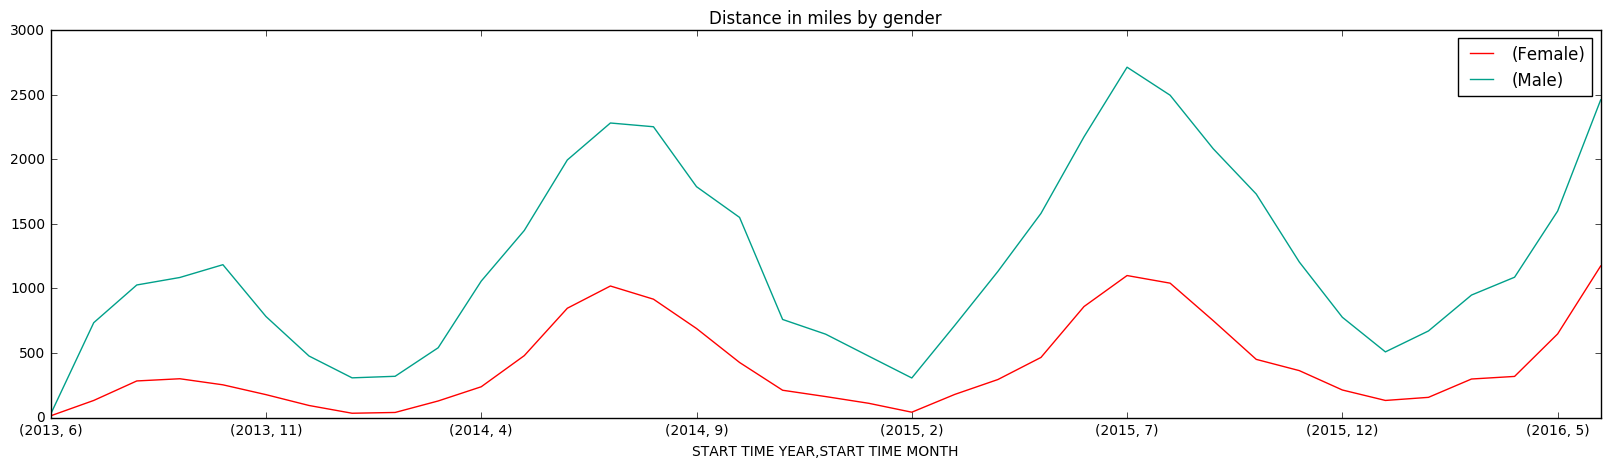

In [24]:
import wes


wes.set_palette('Darjeeling')
#pivot tables
distanceByGender = pd.pivot_table(uniqueStations[(uniqueStations['USER TYPE'] == 'Subscriber') & (uniqueStations['GENDER'] != '')], index=['START TIME YEAR', 'START TIME MONTH'], columns=['GENDER'], 
               values=['DISTANCE_Miles'], aggfunc=len)

distanceByGender.plot(title="Distance in miles by gender", figsize=(20,5))
lgd = plt.legend()
for i in range(len(lgd.get_texts())): 
        text = lgd.get_texts()[i].get_text().replace('(DISTANCE_Miles, ', '(')
        lgd.get_texts()[i].set_text(text)
plt.show()

In [25]:

uniqueStations['BIRTH YEAR'] = np.where(uniqueStations["BIRTH YEAR"] == '', np.nan, uniqueStations["BIRTH YEAR"])

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [26]:
uniqueStations['BIRTH YEAR'] = uniqueStations['BIRTH YEAR'].astype('float')
uniqueStations.loc[:, 'AGE'] = uniqueStations['START TIME YEAR'] - uniqueStations['BIRTH YEAR']

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
#filter riders based on reasonable age
uniqueStations['BIRTH YEAR'][uniqueStations['BIRTH YEAR'].between(1936, 2013)].min()

1938.0

In [28]:
pd.pivot_table(uniqueStations[(uniqueStations['AGE'] <= 80) & (uniqueStations['GENDER'].str.len() > 0)], index=['AGE'], columns=['GENDER'],
               values=['DISTANCE_Miles'], aggfunc=len)

DISTANCE_Miles        
GENDER         Female    Male
AGE                          
16.0              NaN    26.0
17.0             42.0     6.0
18.0             24.0   118.0
19.0             51.0   263.0
20.0             68.0   261.0
21.0             82.0   236.0
22.0            170.0   433.0
23.0            415.0   624.0
24.0            514.0   905.0
25.0            520.0   979.0
26.0            776.0  1394.0
27.0            703.0  1878.0
28.0            608.0  2156.0
29.0            824.0  1733.0
30.0            895.0  1788.0
31.0            613.0  2176.0
32.0            648.0  1817.0
33.0            483.0  1720.0
34.0            549.0  1642.0
35.0            482.0  1228.0
36.0            343.0  1287.0
37.0            308.0   956.0
38.0            298.0   758.0
39.0            382.0   633.0
40.0            473.0   883.0
41.0            308.0   826.0
42.0            176.0   730.0
43.0            101.0   745.0
44.0            367.0   998.0
45.0            246.0   905.0
...               ...     ...
50.0            299.0  1264.0
51.0            207.0  1293.0
52.0            153.0  1118.0
53.0            144.0  1544.0
54.0            121.0   913.0
55.0            194.0   758.0
56.0            187.0   634.0
57.0            194.0   436.0
58.0            126.0   300.0
59.0            204.0   248.0
60.0            141.0   328.0
61.0             44.0   388.0
62.0             83.0   302.0
63.0             48.0   287.0
64.0             37.0   378.0
65.0             48.0   309.0
66.0             41.0   189.0
67.0              9.0   191.0
68.0             12.0   119.0
69.0             24.0    51.0
70.0             15.0    36.0
71.0              1.0    32.0
72.0              1.0    14.0
73.0              NaN    15.0
74.0              NaN     4.0
75.0              NaN    16.0
76.0              NaN     8.0
77.0              NaN     4.0
78.0              NaN     5.0
79.0              NaN     3.0

[64 rows x 2 columns]

In [29]:
uniqueStations['AGE_GROUP'] = np.where(uniqueStations['AGE'].between(0,18, inclusive = True), '0 - 18',
                                       np.where(uniqueStations['AGE'].between(19,29, inclusive = True), '19 - 29',
                                                np.where(uniqueStations['AGE'].between(30,39, inclusive = True), '30 - 39',
                                                         np.where(uniqueStations['AGE'].between(40,49, inclusive = True), '40 - 49',
                                                                  np.where(uniqueStations['AGE'].between(50,65, inclusive = True), '50 - 65',
                                                                           np.where(uniqueStations['AGE'].between(65,999, inclusive = True), '65+', np.nan))))))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
pd.pivot_table(uniqueStations[uniqueStations['USER TYPE'] == 'Subscriber'], index = ['START TIME YEAR'], 
               columns=['AGE_GROUP', 'GENDER'], values=['DISTANCE_Miles'], aggfunc = len)

DISTANCE_Miles                                                                                                   
AGE_GROUP               0 - 18       19 - 29         30 - 39         40 - 49         50 - 65          65+                nan     
GENDER                  Female  Male  Female    Male  Female    Male  Female    Male  Female    Male      Female   Male      Male
START TIME YEAR                                                                                                                  
2013                       1.0  74.0   353.0  1174.0   456.0  1323.0   239.0  1340.0   195.0  1227.0  NaN    7.0  172.0  2.0  1.0
2014                      24.0  29.0  1770.0  3863.0  1548.0  4550.0  1138.0  2900.0   647.0  3419.0  4.0   58.0  174.0  NaN  NaN
2015                      26.0  47.0  1816.0  4162.0  2036.0  5808.0   971.0  3227.0   973.0  3888.0  NaN   41.0  245.0  NaN  NaN
2016                      15.0   NaN   792.0  1663.0   961.0  2324.0   518.0  1188.0   415.0  1966.0  NaN   23.0  128.0  NaN  NaN

In [31]:
miles_by_gender = pd.pivot_table(uniqueStations[(uniqueStations['USER TYPE'] == 'Subscriber') 
                                                & (uniqueStations["AGE"] < 80)
                                                & (uniqueStations["GENDER"].str.len() > 0)
                                                & (uniqueStations["DISTANCE_Miles"] > 0)], index = ['START TIME YEAR'], 
               columns=['GENDER'], values=['DISTANCE_Miles'], aggfunc = len)
print miles_by_gender

                DISTANCE_Miles         
GENDER                  Female     Male
START TIME YEAR                        
2013                    1250.0   5308.0
2014                    5167.0  14933.0
2015                    5856.0  17372.0
2016                    2724.0   7246.0


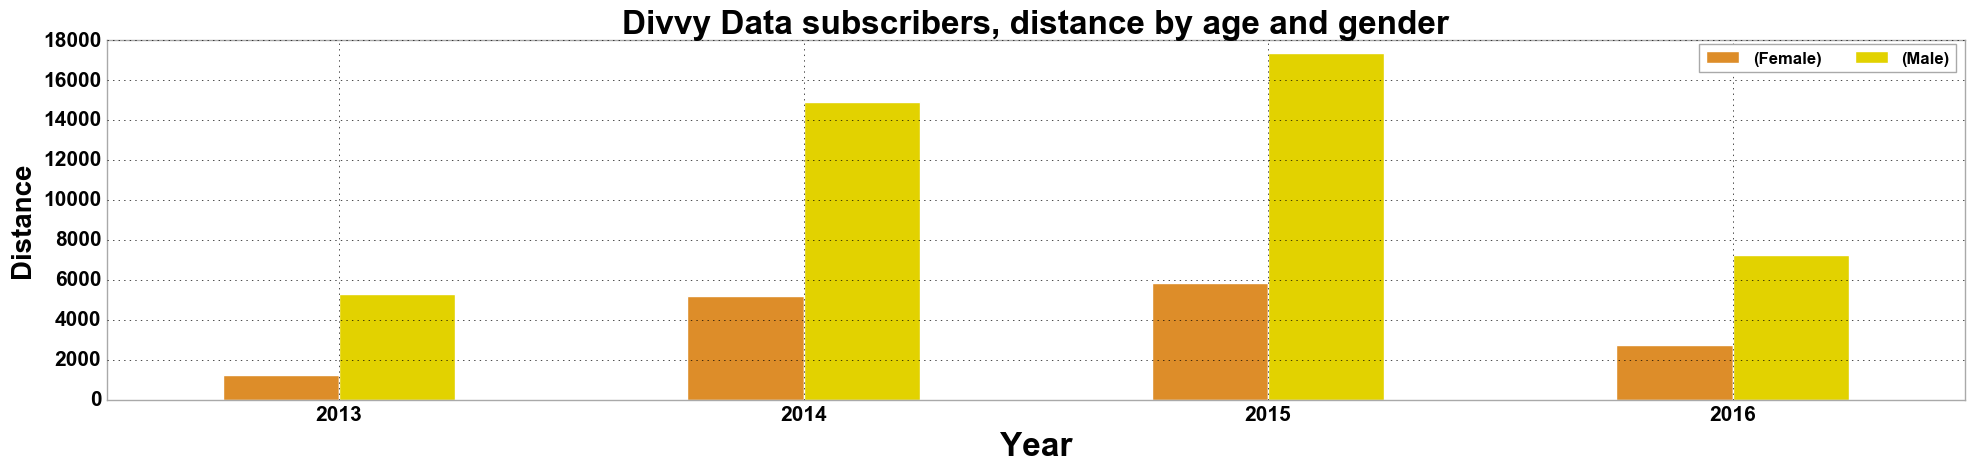

In [32]:
# CONFIGURE PLOT
font = {'family' : 'arial', 'weight' : 'bold', 'size'   : 15}
rc('font', **font); rc("figure", facecolor="white"); rc('axes', edgecolor='darkgray');

def runplot(pvtdf):        
    pvtdf.plot(kind='bar', edgecolor='w',figsize=(20,5), width=0.5, fontsize = 10)
    locs, labels = plt.xticks()    
    plt.title('Divvy Data subscribers, distance by age and gender', weight='bold', size=24)
    lgd = plt.legend(loc='right', ncol=14, frameon=True, shadow=False, prop={'size': 12},
               bbox_to_anchor=(1, 0.95))
    for i in range(len(lgd.get_texts())): 
        text = lgd.get_texts()[i].get_text().replace('(DISTANCE_Miles, ', '(')
        lgd.get_texts()[i].set_text(text)

    plt.xlabel('Year', weight='bold', size=24)
    plt.ylabel('Distance', weight='bold', size=20)
    plt.tick_params(axis='x', bottom='off', top='off', labelsize=15)
    plt.tick_params(axis='y', left='off', right='off', labelsize=15)
    #plt.set_major_formatter
    #plt.ylim([0,25000])
    plt.grid(b=True)
    plt.setp(labels, rotation=0, rotation_mode="anchor", ha="center")
    plt.tight_layout()
    plt.show()
    
    
wes.set_palette('FantasticFox')    
runplot(miles_by_gender)

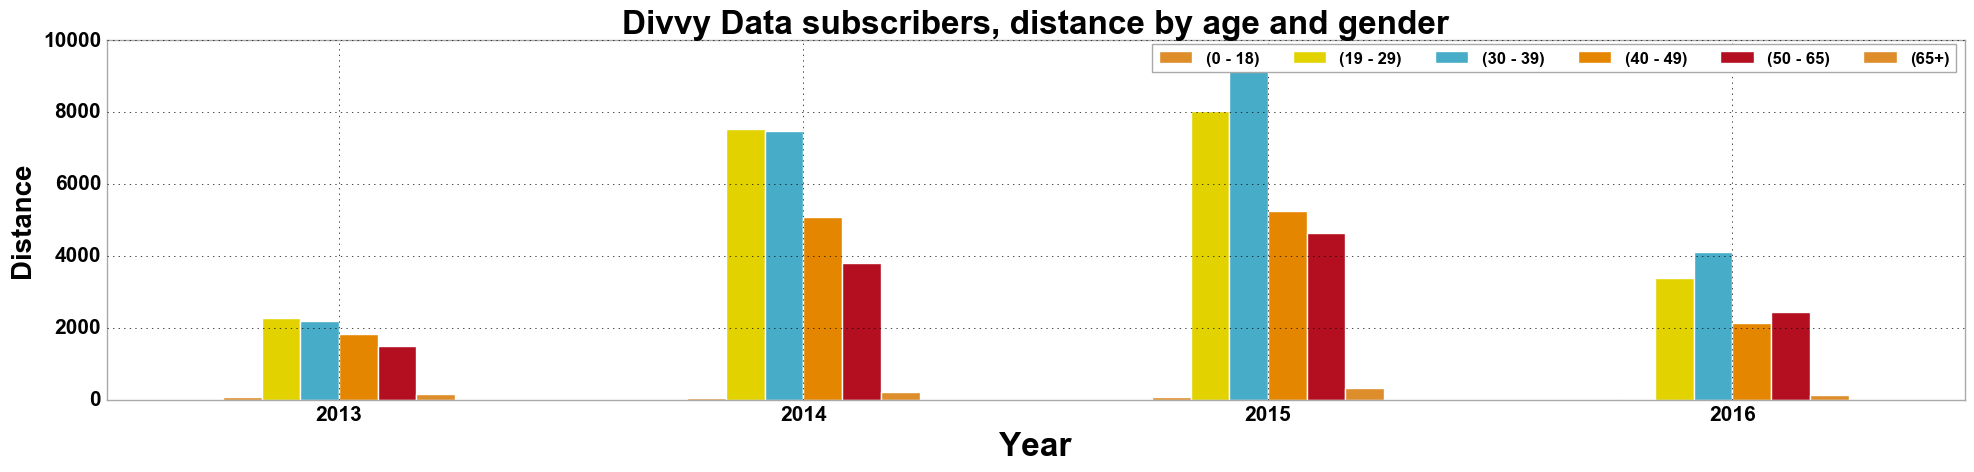

In [33]:
wes.set_palette('FantasticFox')
miles_by_age = pd.pivot_table(uniqueStations[(uniqueStations['USER TYPE'] == 'Subscriber') 
                                                & (uniqueStations["AGE"] < 80)
                                                & (uniqueStations["GENDER"].str.len() > 0)
                                                & (uniqueStations["DISTANCE_Miles"] > 0)], index = ['START TIME YEAR'], 
               columns=['AGE_GROUP'], values=['DISTANCE_Miles'], aggfunc = np.sum)

runplot(miles_by_age)

In [34]:
from functools import reduce
mergelist = []

for yr in list(range(2013,2017)):
    miles_by_gender_pie = uniqueStations[(uniqueStations['USER TYPE'] == 'Subscriber') 
                                         & (uniqueStations['START TIME YEAR']==yr)
                                         & (uniqueStations["GENDER"].str.len() > 0)].\
                                     groupby(["GENDER", "START TIME YEAR"])["DISTANCE_Miles"].apply(len).reset_index()
    mergelist.append(miles_by_gender_pie[['GENDER', 'DISTANCE_Miles']])

miles_by_gender_pie = reduce(lambda left,right: pd.merge(left, right, on='GENDER'), mergelist)    
miles_by_gender_pie.columns = ['GENDER', '2013', '2014', '2015', '2016']
#miles_by_gender_pie.index = miles_by_gender_pie['GENDER']
miles_by_gender_pie

,GENDER,2013,2014,2015,2016
0,Female,1251,5185,5863,2724
1,Male,5311,14935,17377,7269


/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


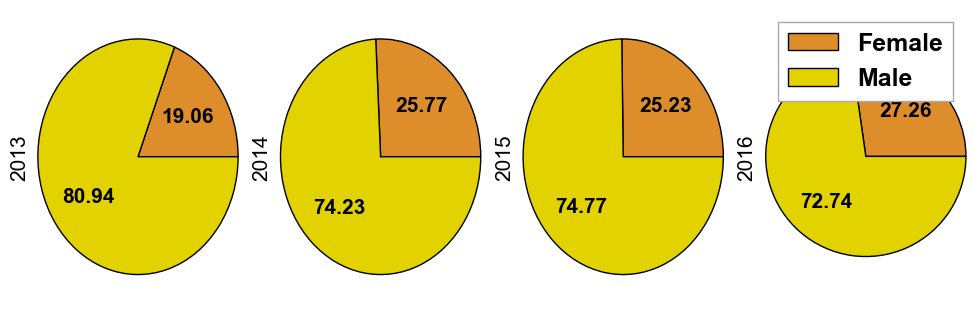

In [35]:
labels = 'Female', 'Male'
#pie = plt.pie(miles_by_gender_pie, labels=labels)
miles_by_gender_pie.plot.pie(subplots=True, labels=['', ''], figsize=(12,3.8), autopct='%.2f')
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

START TIME
2016-05-19 07:50:00     26.100000
2016-05-19 06:48:00     19.216667
2016-05-15 14:41:00      6.833333
2016-05-15 13:49:00      5.583333
2016-05-15 05:56:00     17.366667
2016-02-06 13:00:00      9.933333
2016-02-06 12:43:00     16.800000
2016-01-29 13:42:00      7.600000
2016-01-28 17:42:00      5.850000
2015-11-07 09:22:00     14.216667
2015-11-06 19:00:00      3.750000
2015-11-02 09:14:00     26.966667
2015-11-01 19:36:00     48.366667
2015-11-01 14:11:00     18.583333
2015-09-29 14:37:00     23.150000
2015-09-29 13:47:00     18.050000
2015-09-11 15:36:00     62.000000
2015-09-11 09:29:00      4.500000
2015-08-22 13:03:00     20.833333
2015-08-22 11:29:00     15.150000
2015-08-05 16:32:00     12.650000
2015-08-05 15:34:00     24.583333
2015-07-29 15:33:00      8.900000
2015-07-29 14:53:00      8.833333
2015-07-22 17:45:00     32.466667
2015-07-22 17:32:00     11.266667
2015-06-30 22:04:00     16.466667
2015-06-30 17:16:00     10.116667
2015-06-29 15:33:00     51.416667
201

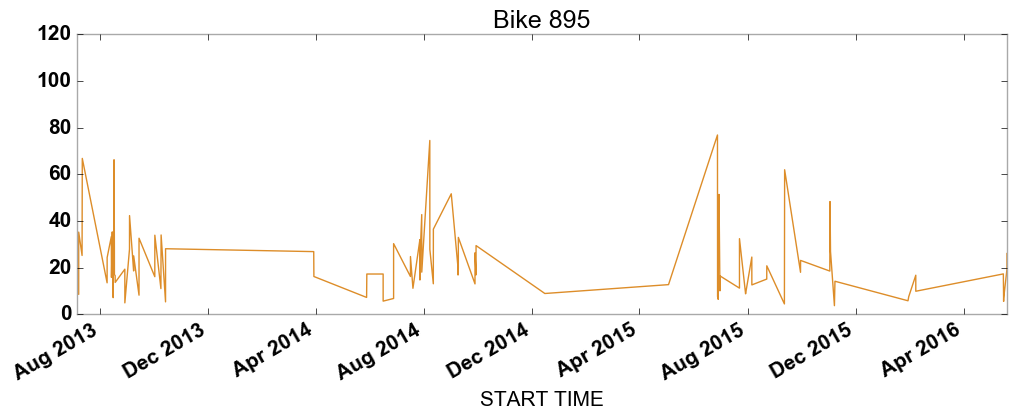

In [36]:
tripDuration = uniqueStations[uniqueStations["BIKE ID"] == '895']['TRIP DURATION']/60
tripDuration.index = uniqueStations[uniqueStations["BIKE ID"] == '895']['START TIME']
print tripDuration
#tripDate = np.log(tripDate)
tripDuration.plot(title="Bike 895", figsize=(12,4))
plt.show()

#print uniqueStations["BIKE ID"]

In [37]:
#pie chart for subscribers vs nonsubscribers

#print uniqueStations["USER TYPE"];
#users = pd.pivot_table(uniqueStations, index=['START TIME YEAR'], columns= ['USER TYPE'], values = ['TRIP DURATION'], aggfunc = len)
#print users
        
user_type_pie = uniqueStations.groupby(["START TIME YEAR","USER TYPE"]).apply(len).reset_index()
user_type_pie.columns = ['Year', 'User Type', 'People']

customervsubscriber = pd.pivot_table(user_type_pie, index=['User Type'], columns=['Year'], values=['People'])

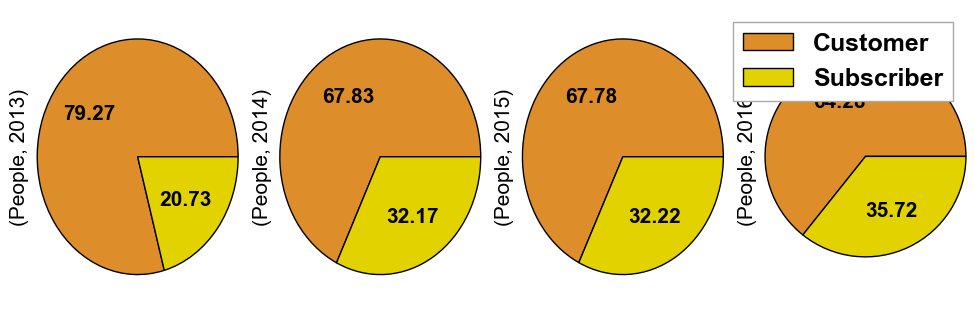

In [38]:
labels = ['Customer', 'Subscriber']
customervsubscriber.plot.pie(subplots=True, labels=['', ''], figsize=(12,3.8), autopct='%.2f')
plt.axis('equal')
plt.legend(labels=labels)
plt.show()

In [39]:
#Usage over time period

uniqueStations.loc[:, 'START TIME HOUR'] = uniqueStations['START TIME'].dt.hour
totalTripsTaken = uniqueStations["START TIME HOUR"]

#Long winded way of doing things
#get_hours = pd.pivot_table(uniqueStations, index=['START TIME'])
# get_hours.index.hour

uniqueStations['TIME FRAME'] = np.where(uniqueStations['START TIME HOUR'].between(0,1, inclusive = True), '00:00-01:00',
                                        np.where(uniqueStations['START TIME HOUR'].between(1,2, inclusive = True), '01:00-02:00',
                                                 np.where(uniqueStations['START TIME HOUR'].between(2,3, inclusive = True), '02:00-03:00',
                                                          np.where(uniqueStations['START TIME HOUR'].between(3,4, inclusive = True), '03:00-04:00',
                                                                 np.where(uniqueStations['START TIME HOUR'].between(4,5, inclusive = True), '04:00-05:00',
                                                                         np.where(uniqueStations['START TIME HOUR'].between(5,6, inclusive = True), '05:00-06:00',
                                                                                 np.where(uniqueStations['START TIME HOUR'].between(6,7, inclusive = True), '06:00-07:00',
                                                                                         np.where(uniqueStations['START TIME HOUR'].between(7,8, inclusive = True), '07:00-08:00',
                                                                                                 np.where(uniqueStations['START TIME HOUR'].between(8,9, inclusive = True), '08:00-09:00',
                                                                                                         np.where(uniqueStations['START TIME HOUR'].between(9,10, inclusive = True), '09:00-10:00', 
                                                                                                                  np.where(uniqueStations['START TIME HOUR'].between(10,11, inclusive = True), '10:00-11:00',
                                                                                                                           np.where(uniqueStations['START TIME HOUR'].between(11,12, inclusive = True), '11:00-12:00',
                                                                                                                                    np.where(uniqueStations['START TIME HOUR'].between(12,13, inclusive = True), '12:00-13:00', 
                                                                                                                                             np.where(uniqueStations['START TIME HOUR'].between(13,14, inclusive = True), '13:00-14:00', 
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(14,15, inclusive = True), '14:00-15:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(15,16, inclusive = True), '15:00-16:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(16,17, inclusive = True), '16:00-17:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(17,18, inclusive = True), '17:00-18:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(18,19, inclusive = True), '18:00-19:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(19,20, inclusive = True), '19:00-20:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(20,21, inclusive = True), '20:00-21:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(21,22, inclusive = True), '21:00-22:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(22,23, inclusive = True), '22:00-23:00',
                                                                                                                                                      np.where(uniqueStations['START TIME HOUR'].between(23,24, inclusive = True), '23:00-24:00', np.nan))))))))))))))))))))))))


#add weekend column and weekday column
uniqueStations['WEEKDAY TYPE'] = np.where(uniqueStations['START WEEKDAY'].isin(['Saturday', 'Sunday']), 'WEEKEND', 'WEEKDAY')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [40]:
# def fmttr(x):
#     return "{} - {}".format(x-1,x)
# uniqueStations['START TIME HOUR'].map(fmttr)

uniqueStations.loc[:, 'TIME RANGE'] = uniqueStations['START TIME HOUR'].map(lambda x: "{}:00-{}:00".format(x-1, x))
uniqueStations.head()

,TRIP ID,START TIME,STOP TIME,BIKE ID,TRIP DURATION,FROM STATION ID,FROM STATION NAME,TO STATION ID,TO STATION NAME,USER TYPE,...,START TIME YEAR,STOP TIME MONTH,STOP TIME YEAR,START WEEKDAY,AGE,AGE_GROUP,START TIME HOUR,TIME FRAME,WEEKDAY TYPE,TIME RANGE
4,10426476,2016-06-30 23:14:00,2016-06-30 23:14:00,4199,1721.0,35,Streeter Dr & Grand Ave,90,Millennium Park,Customer,...,2016,6,2016,Thursday,NaN,nan,23,22:00-23:00,WEEKDAY,22:00-23:00
5,10426478,2016-06-30 23:14:00,2016-06-30 23:14:00,1858,1717.0,35,Streeter Dr & Grand Ave,90,Millennium Park,Customer,...,2016,6,2016,Thursday,NaN,nan,23,22:00-23:00,WEEKDAY,22:00-23:00
6,10426393,2016-06-30 23:04:00,2016-06-30 23:04:00,771,1159.0,35,Streeter Dr & Grand Ave,90,Millennium Park,Customer,...,2016,6,2016,Thursday,NaN,nan,23,22:00-23:00,WEEKDAY,22:00-23:00
7,10426391,2016-06-30 23:03:00,2016-06-30 23:03:00,399,1173.0,35,Streeter Dr & Grand Ave,90,Millennium Park,Customer,...,2016,6,2016,Thursday,NaN,nan,23,22:00-23:00,WEEKDAY,22:00-23:00
8,10426207,2016-06-30 22:35:00,2016-06-30 22:35:00,2826,570.0,90,Millennium Park,112,Green St & Randolph St,Subscriber,...,2016,6,2016,Thursday,29.0,19 - 29,22,21:00-22:00,WEEKDAY,21:00-22:00


In [41]:
#thing = uniqueStations.groupby(['TIME FRAME'])['TRIP ID'].agg('count')
# TripsbyDay = uniqueStations.groupby(['START WEEKDAY'])['TIME FRAME'].agg('count')
# TripsbyDay.plot(title="Bike Trips over time", figsize=(20,4))
# plt.show()
wes.set_palette('Darjeeling')
trips = pd.pivot_table(uniqueStations, index=['TIME FRAME'], columns=['START WEEKDAY'], values=['TRIP DURATION'], aggfunc='count')
trips.plot(title="Bike Trips over 1 day for weekday/weekend", figsize=(15,10))
lgd = plt.legend()

for i in range(len(lgd.get_texts())): 
        text = lgd.get_texts()[i].get_text().replace('(TRIP DURATION, ', '(')
        lgd.get_texts()[i].set_text(text)
        handles, labels = ax.axes.get_legend_handles_labels() 

plt.show()

AttributeError: 'module' object has no attribute 'axes'

In [ ]:
trips = pd.pivot_table(uniqueStations, index=['TIME FRAME'], columns=['WEEKDAY TYPE'], values=['TRIP DURATION'], aggfunc='count')
trips.plot(title="Bike Trips over 1 day for weekday/weekend", figsize=(15,10))
lgd = plt.legend()

for i in range(len(lgd.get_texts())): 
        text = lgd.get_texts()[i].get_text().replace('(TRIP DURATION, ', '(')
        lgd.get_texts()[i].set_text(text)

plt.show()

#uniqueStations[~uniqueStations['START WEEKDAY'].isin(['SATURDAY', 'SUNDAY'])]['WEEKDAY TYPE']

In [ ]:
# most popular destination
#uniqueStations['FROM STATION ID'].head()

millenium = uniqueStations[uniqueStations['FROM STATION NAME'] == 'Millennium Park']
mil = millenium[millenium['TO STATION NAME'] != 'Millenium Park']

table = pd.pivot_table(mil, index=['TO STATION NAME'], values=['BIKE ID'], aggfunc='count')
table[table['BIKE ID'] == 7097]


#mil.groupby('TO STATION NAME')['TRIP DURATION'].count().max()

#distance between the two most poplar destinations


In [43]:
uniqueStations[['FROM STATION ID', 'TO STATION ID', 'TO STATION NAME', 'FROM STATION NAME']].drop_duplicates()
#uniqueStations[uniqueStations['FROM STATION ID'] == 90]

,FROM STATION ID,TO STATION ID,TO STATION NAME,FROM STATION NAME
4,35,90,Millennium Park,Streeter Dr & Grand Ave
8,90,112,Green St & Randolph St,Millennium Park
9,90,171,May St & Cullerton St,Millennium Park
10,90,255,Indiana Ave & Roosevelt Rd,Millennium Park
13,255,90,Millennium Park,Indiana Ave & Roosevelt Rd
14,90,107,Desplaines St & Jackson Blvd,Millennium Park
15,90,341,Adler Planetarium,Millennium Park
17,90,191,Canal St & Monroe St (*),Millennium Park
18,108,90,Millennium Park,Halsted St & Polk St
19,90,85,Michigan Ave & Oak St,Millennium Park


In [ ]:
uniqueStations.columns

In [ ]:
# NEW STUFF
df.loc[:, 'weekend_rides'] = df['sunday_rides'] + df['']
pd.pivot_table(df, )